# t-Tests

***

In [1]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [2]:
# Calculate the Probability Density Function
# in the formula e means the exponential function
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [3]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [4]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

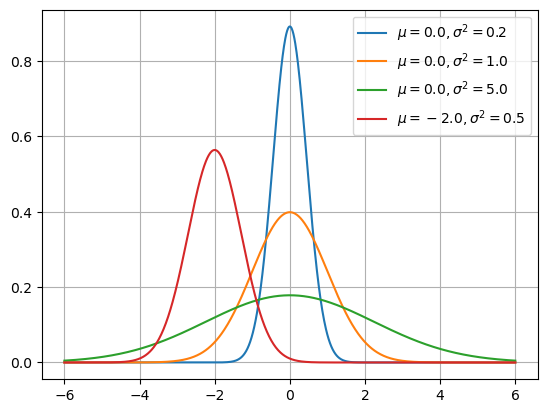

In [6]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$') # add labels for legend

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

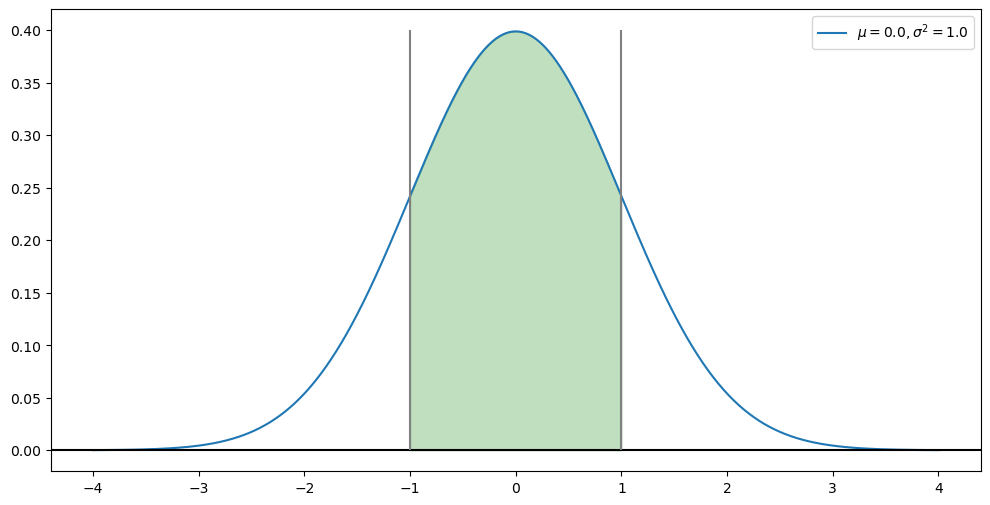

In [7]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values. REturns evenly spaced numbers over a specified interval.
x = np.linspace(-4.0, 4.0, 1001) # start, stop and number of samples

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis. Adds a horizontal line at 0
ax.axhline(0.0, color='black')

# Add vertical lines at 1 & -1 going up to 0.4.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25) # alpha makes the colour a little more transparent

# Add a legend.
ax.legend();

In [8]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


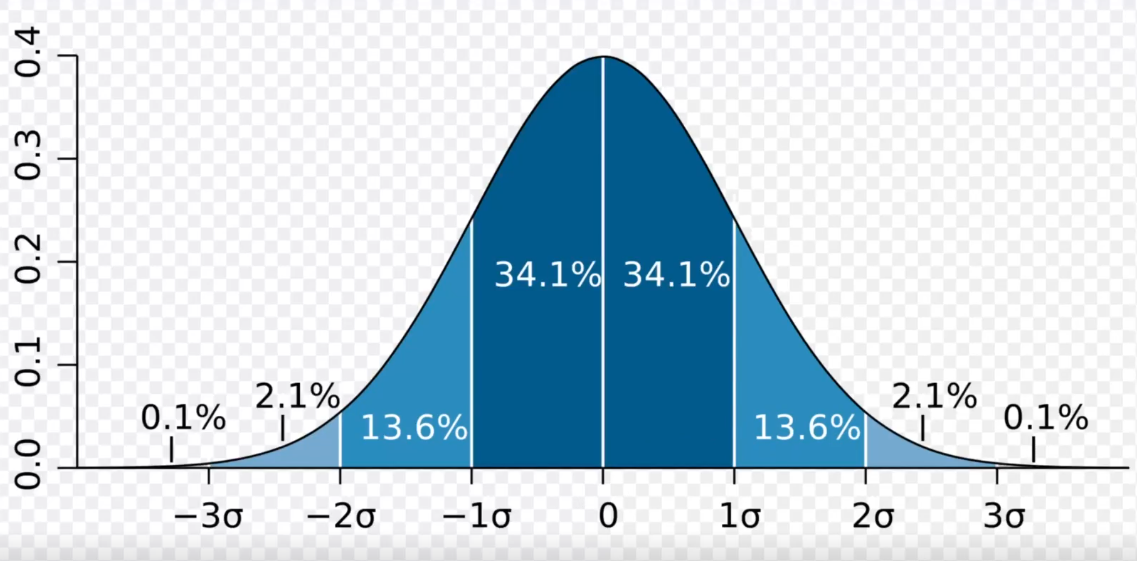

For Normal disrtibution approximately 68.27% of data lies within 1 standard deviation of the mean. Approximately 95.4% of data lies within 2 standard deviations of the mean and approximately 99.6% of data lies within 3 standard deviations of the mean.

## Normal Data

***

In [9]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

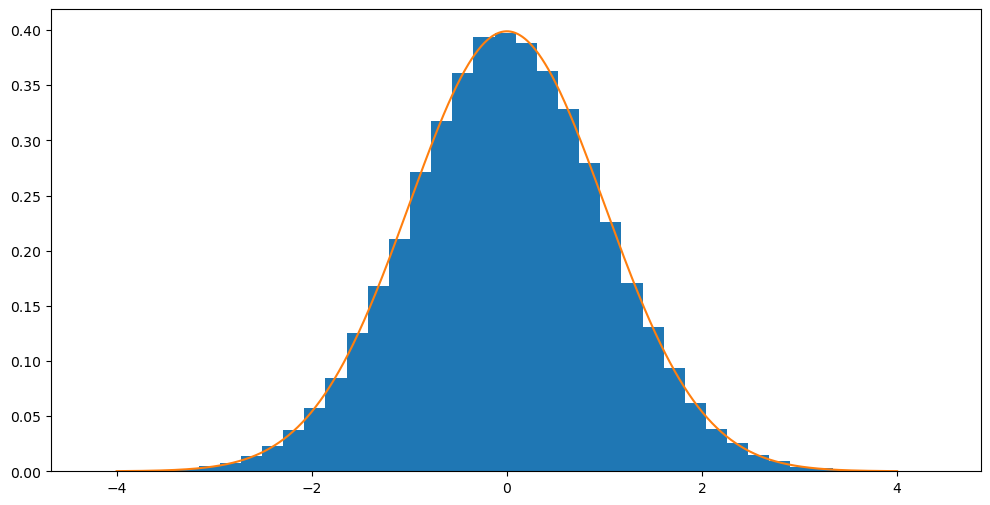

In [10]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [11]:
# Generate some random normal data. Each value is from a standard normal distributons 
# All parameters (e.g., mean, variance, standard deviation, etc) are equal
# Each value is independant of each other.
random_data = np.random.standard_normal((10000, 25))

# Show.
random_data

array([[ 1.48810065,  1.04495139,  1.71362162, ...,  0.99063841,
         0.04128845, -0.55104016],
       [-1.1653947 ,  0.54167772,  1.33165071, ..., -1.17142897,
         0.90560526, -0.26222955],
       [ 1.49291582, -0.53404198,  0.7268825 , ..., -0.05074664,
         1.49013089, -0.02004235],
       ...,
       [ 1.13037173, -1.86221139, -1.29771147, ...,  0.5589168 ,
        -0.28290101,  1.57934501],
       [-0.21472322,  0.08869269, -0.25105581, ..., -1.09295738,
        -0.41507154,  0.66879015],
       [-1.42710317, -1.06361015,  0.48303355, ...,  2.05611974,
        -1.46501449,  0.23502718]])

In [12]:
# Mean across the rows.
random_data.mean(axis=1)

array([ 0.45411066, -0.16774094,  0.14891905, ...,  0.12178013,
       -0.06009015, -0.22375636])

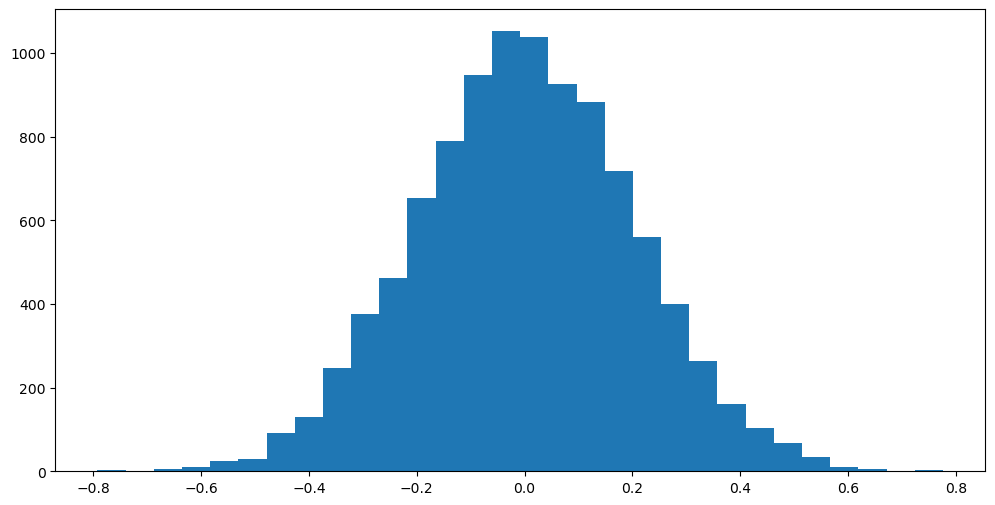

In [13]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

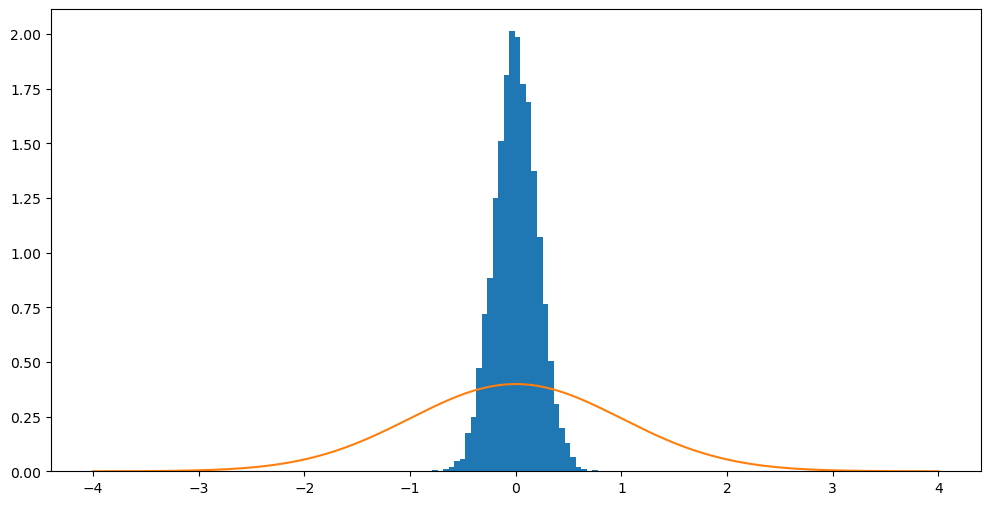

In [14]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
# density =true makes the y axis percentages instead of count. Remove this to see that 
# 'orange' plot is virtually illegible.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

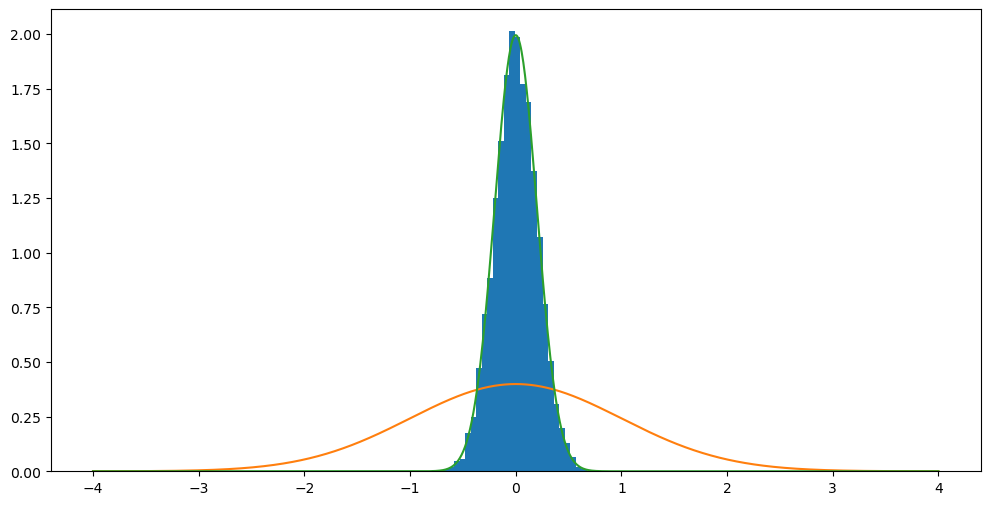

In [15]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot normal distribution with mu = 0.0 and sigma = 0.2.
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y);

## Random Normal

***

In [16]:
# Let's pick a random mean value.
random_mu = np.random.uniform(-3.0, 3.0)

# Show.
# random_mu

In [17]:
# Generate some random normal data with this unknown mu.
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show.
random_data

array([[-0.8779895 , -1.26465755, -1.27068425, ...,  0.18993414,
         0.95699237, -0.45522757],
       [-0.65151827,  0.57273405, -0.12440596, ..., -1.75556758,
        -1.48726123, -1.08239316],
       [-0.87501797,  0.0255274 ,  0.36651091, ...,  0.32773258,
         0.17958233, -0.25752906],
       ...,
       [ 0.33708866, -0.45358006, -3.23536711, ...,  0.37185349,
        -0.05566189, -0.29700732],
       [-2.0176606 , -0.44529012, -0.76764989, ...,  1.2142895 ,
        -0.03423556, -0.28314537],
       [-0.38231596, -1.91635832, -3.24617283, ..., -0.21425551,
        -3.38453343,  2.48090394]])

(array([1.82556743e-03, 0.00000000e+00, 0.00000000e+00, 5.47670230e-03,
        1.27789720e-02, 1.64301069e-02, 5.11158881e-02, 1.00406209e-01,
        1.98986850e-01, 3.17648733e-01, 5.49495797e-01, 7.48482647e-01,
        1.11359613e+00, 1.46775622e+00, 1.71055668e+00, 1.88946229e+00,
        1.96431056e+00, 1.94970602e+00, 1.76897484e+00, 1.37282671e+00,
        1.10264273e+00, 7.88645131e-01, 5.03856611e-01, 2.93916357e-01,
        1.64301069e-01, 8.03249670e-02, 4.74647532e-02, 1.46045395e-02,
        1.09534046e-02, 9.12783716e-03]),
 array([-1.42012546, -1.36534797, -1.31057048, -1.25579299, -1.20101551,
        -1.14623802, -1.09146053, -1.03668304, -0.98190555, -0.92712806,
        -0.87235057, -0.81757308, -0.76279559, -0.7080181 , -0.65324062,
        -0.59846313, -0.54368564, -0.48890815, -0.43413066, -0.37935317,
        -0.32457568, -0.26979819, -0.2150207 , -0.16024321, -0.10546573,
        -0.05068824,  0.00408925,  0.05886674,  0.11364423,  0.16842172,
         0.22319

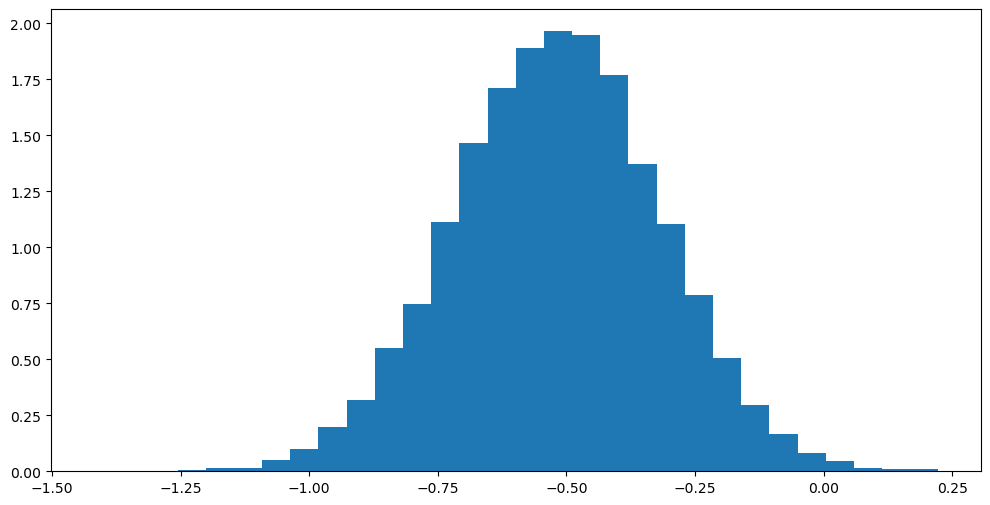

In [18]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [19]:
# Estimate random_mu from above histogram.
# Now look at the value.
random_mu

-0.5213625122510495

In [20]:
# A random sample of size 50.
sample = np.random.normal(random_mu, 1.0, 50)

# Show.
sample

array([-2.47278295, -1.85921247, -0.81566336, -1.06075325,  0.46850257,
        0.0280203 ,  0.37755196, -1.11773746, -1.16851265, -0.515265  ,
        0.52291917, -1.54123691, -0.54441183,  1.54675672,  0.84223855,
       -1.58668934, -0.6886297 , -1.08821795, -1.08359695, -0.96019706,
       -0.91805518, -0.97511083, -0.19248115,  1.36267484,  1.49504058,
        1.12368715, -0.03421307, -0.47692498, -1.09823986, -0.33232192,
       -2.43498926,  0.47807716, -0.67559063,  1.54852487,  1.3645136 ,
       -0.00707366,  0.8547395 ,  1.69347851,  0.01653898, -1.36988175,
       -1.50405662,  0.90045943, -1.54718789, -2.00947972,  0.47472383,
       -1.8638742 , -1.86545481, -0.79727898, -0.77350265, -2.46531513])

In [21]:
# Calculate the mean of the sample.
sample.mean()

-0.454909829599592

## Independent Samples t-test

***

In [22]:
# Load Iris.
df = pd.read_csv('data/iris.csv')

# Show.
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris.csv'

In [ ]:
# Setosa petal length.
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [ ]:
# Virginica petal length.
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [ ]:
# t-test.
ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

## End